<a href="https://colab.research.google.com/github/charul178/Prediction-and-Forecasting-Stock-Price/blob/main/Prediction%20and%20Forecasting%20Stock%20Price%20using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load stock data for AAPL
data = yf.download('AAPL', start='2010-01-01', end='2024-05-01')

/tmp/ipython-input-3-1889381180.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2010-01-01', end='2024-05-01')
[*********************100%***********************]  1 of 1 completed


In [4]:

# Extract the 'Close' column
data = data[['Close']]

In [5]:
# Function to prepare the dataset
def prepare_data(stock_symbol, start_date='2010-01-01', end_date='2024-05-01'):
    # Load dataset
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']]

In [6]:
def prepare_data(ticker, time_step=60):
    # Load stock data for the ticker
    data = yf.download(ticker, start='2010-01-01', end='2024-05-01')[['Close']]

In [7]:
# Verify data loading
print(data.head())  # Optional: Check if data has been loaded correctly

Price          Close
Ticker          AAPL
Date                
2010-01-04  6.431899
2010-01-05  6.443015
2010-01-06  6.340531
2010-01-07  6.328809
2010-01-08  6.370885


In [8]:

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [9]:
print(type(data))  # Ensure it's a DataFrame
print(data.columns)  # Ensure it has a 'Close' column

<class 'pandas.core.frame.DataFrame'>
MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [10]:
# Define training data size (e.g., 80% for training and 20% for testing)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [11]:
print(len(scaled_data))  # Ensure data is loaded and scaled correctly
print(len(train_data), len(test_data))  # Verify the split


3605
2884 721


In [12]:
# Function to create datasets
def create_dataset(dataset, time_step=60):
    x, y = [], []
    for i in range(len(dataset) - time_step - 1):
        x.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

In [13]:
# Function to prepare data
def prepare_data(ticker, time_step=60):
    data = yf.download(ticker, start='2010-01-01', end='2024-05-01')[['Close']]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    train_size = int(len(scaled_data) * 0.8)
    train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
    x_train, y_train = create_dataset(train_data, time_step)
    x_test, y_test = create_dataset(test_data, time_step)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
    return x_train, y_train, x_test, y_test, scaler, data

In [14]:
# Function to build and train the model
def build_and_train_model(x_train, y_train, epochs=100, batch_size=64):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    return model

In [15]:
# Prepare data for AAPL and MSFT
x_train_aapl, y_train_aapl, x_test_aapl, y_test_aapl, scaler_aapl, data_aapl = prepare_data('AAPL')
x_train_msft, y_train_msft, x_test_msft, y_test_msft, scaler_msft, data_msft = prepare_data('MSFT')


/tmp/ipython-input-13-3169266743.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2010-01-01', end='2024-05-01')[['Close']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-13-3169266743.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2010-01-01', end='2024-05-01')[['Close']]
[*********************100%***********************]  1 of 1 completed


In [16]:
# Train models for AAPL and MSFT
model_aapl = build_and_train_model(x_train_aapl, y_train_aapl, epochs=100)
model_msft = build_and_train_model(x_train_msft, y_train_msft, epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - loss: 0.0134
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 6.5374e-04
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.2786e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.4670e-04
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 4.2241e-04
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.9455e-04
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 3.5334e-04
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.3052e-04
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.8738e-04
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.0390e-04
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.2839e-04
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.1693e-04
Epoch 13/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.6109e-04
Epoch 14/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.8998e-04
Epoc

In [17]:
# Predict for AAPL and MSFT
pred_aapl = model_aapl.predict(x_test_aapl)
pred_aapl = scaler_aapl.inverse_transform(pred_aapl)
y_test_aapl = scaler_aapl.inverse_transform([y_test_aapl])

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [18]:
pred_msft = model_msft.predict(x_test_msft)
pred_msft = scaler_msft.inverse_transform(pred_msft)
y_test_msft = scaler_msft.inverse_transform([y_test_msft])

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [19]:
# Calculate RMSE
rmse_aapl = np.sqrt(mean_squared_error(y_test_aapl[0], pred_aapl[:, 0]))
rmse_msft = np.sqrt(mean_squared_error(y_test_msft[0], pred_msft[:, 0]))
print(f'AAPL RMSE: {rmse_aapl}')
print(f'MSFT RMSE: {rmse_msft}')

AAPL RMSE: 5.996048853907996
MSFT RMSE: 11.699849404837524


In [20]:
# Plot actual vs predicted prices for AAPL and MSFT
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

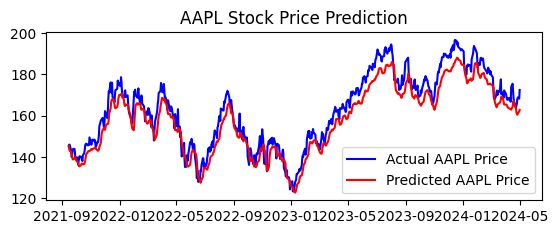

In [21]:
plt.subplot(2, 1, 1)
plt.plot(data_aapl.index[len(data_aapl) - len(y_test_aapl[0]):], y_test_aapl[0], label='Actual AAPL Price', color='blue')
plt.plot(data_aapl.index[len(data_aapl) - len(pred_aapl):], pred_aapl[:, 0], label='Predicted AAPL Price', color='red')
plt.title('AAPL Stock Price Prediction')
plt.legend()

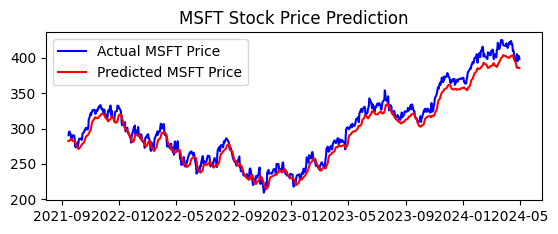

In [22]:
plt.subplot(2, 1, 2)
plt.plot(data_msft.index[len(data_msft) - len(y_test_msft[0]):], y_test_msft[0], label='Actual MSFT Price', color='blue')
plt.plot(data_msft.index[len(data_msft) - len(pred_msft):], pred_msft[:, 0], label='Predicted MSFT Price', color='red')
plt.title('MSFT Stock Price Prediction')
plt.legend()

In [23]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>